## ___Descriptive Statistics___

Another important aspect of Descriptive Analysis is visualization of data to understand it better and draw insights.

In [0]:
# Importing Libraries
import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
deliveries = pd.read_csv('/content/deliveries.csv')
matches = pd.read_csv('/content/matches.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


#### ___Bar Plot___

A bar chart is a graph with rectangular bars. The graph usually compares different categories. Although the graphs can be plotted vertically (bars standing up) or horizontally (bars laying flat from left to right), the most usual type of bar graph is vertical.

The horizontal (x) axis represents the categories; The vertical (y) axis represents a value for those categories. 

A bar graph is useful for looking at a set of data and making comparisons. For example, it’s easier to see which items are taking the largest chunk of your budget by glancing at the above chart rather than looking at a string of numbers.

Bar charts can also represent more complex categories with stacked bar charts or grouped bar charts. 

Although they bar charts and histograms look the same, but they have one important difference: __they plot different types of data__. Bar Chart is used to plot discrete data whereas the continous data is plotted using Histograms.

In [0]:
Wins = matches.winner.value_counts().rename_axis('Team').to_frame('Wins').reset_index()

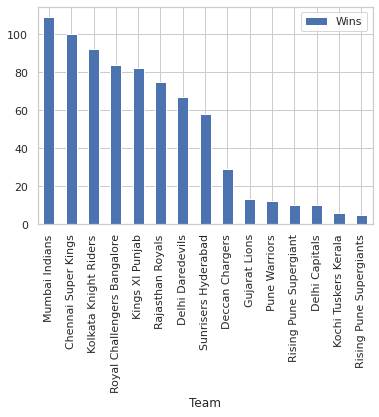

In [0]:
# using Default Pandas Function 
Wins.plot.bar(x = 'Team', rot = 90)

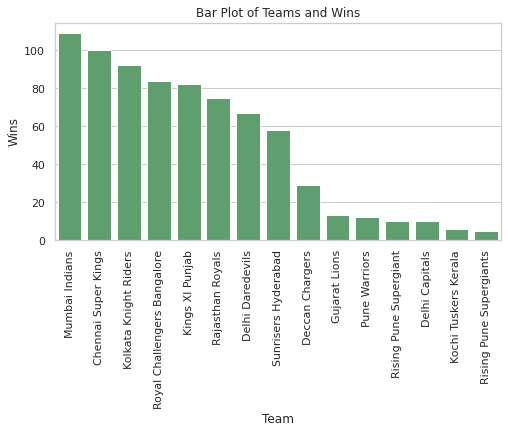

In [0]:
# Bar Plot to visualize the number of wins by a team

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 4))

# Plot the total wins by each team
sns.barplot(x="Team", y="Wins", data=Wins, color="g")
ax.set_xticklabels(Wins.Team, rotation = 90)
plt.title('Bar Plot of Teams and Wins')
plt.show()

In [0]:
xtab = pd.crosstab(matches['winner'],matches['result']).reset_index()

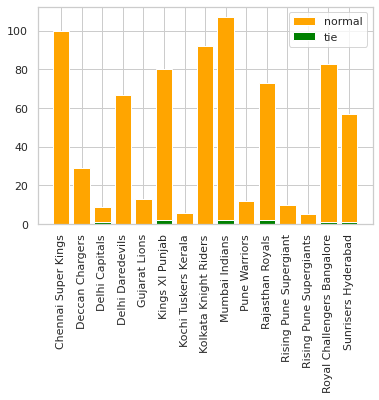

In [0]:
# Stacked Chart
ax = plt.subplot(111)
ax.bar(xtab.winner,xtab.normal, color = 'orange')
ax.bar(xtab.winner,xtab.tie, color = 'green')
ax.set_xticklabels(xtab.winner,rotation = 90)
ax.legend(['normal','tie'])
plt.show()

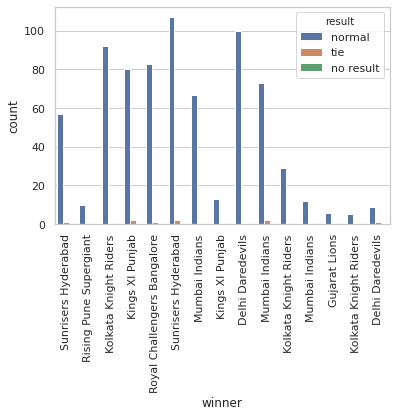

In [0]:
# Categorical Count Plot
fi = sns.countplot(matches.winner, hue = matches.result)
fi.set_xticklabels(matches.winner,rotation = 90)
plt.show()

#### ___Histograms___

Histograms are similar to bar charts; they are a way to display counts of data. A bar graph charts actual counts against categories; The height of the bar indicates the number of items in that category. A histogram displays the same categorical variables in “bins”.

A histogram divides the variable into bins, counts the data points in each bin, and shows the bins on the x-axis and the counts on the y-axis. 

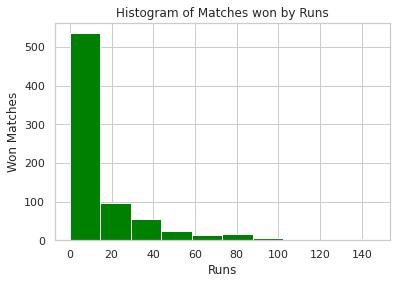

In [0]:
# Matplotlib histogram for matches won by runs
plt.hist(matches.win_by_runs, color = 'green')

# Add labels
plt.title('Histogram of Matches won by Runs')
plt.xlabel('Runs')
plt.ylabel('Count of Won Matches')
plt.show()

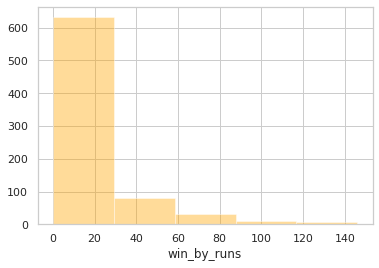

In [0]:
# seaborn histogram
sns.distplot(matches.win_by_runs, hist=True, kde=False, bins=int(140/28), color = 'orange')

#### ___Density Plot___

A density plot is a smoothed, continuous version of a histogram estimated from the data. The most common form of estimation is known as ___Kernel Density Estimation___ (KDE is a non-parametric way to estimate the probability density function of a random variable). In this method, a continuous curve (the kernel) is drawn at every individual data point and all of these curves are then added together to make a single smooth density estimation. The kernel most often used is a Gaussian (which produces a Gaussian bell curve at each data point).

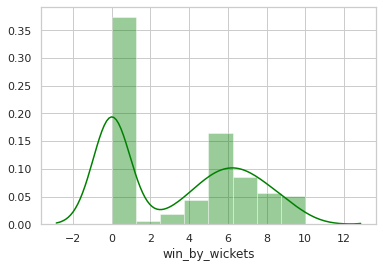

In [0]:
sns.distplot(matches.win_by_wickets, hist=True, kde=True, color = 'green') # Seaborn

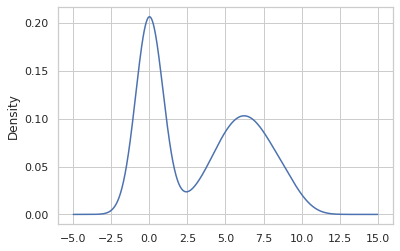

In [0]:
matches.win_by_wickets.plot(kind='density') # Matplotlib

#### ___Box-Whisker Plot___

Box and whisker plots (or box plots) represents five-number summary of the dataset. The five-number values are,

* Minimum
* First quartile (25th percentile)
* Median (50th percentile)
* Third quartile (75th percentile)
* Maximum

The following is a representation of box-and-whisker plot:

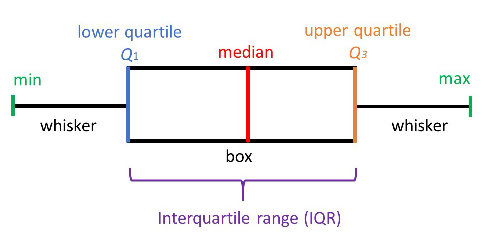

Data sets can sometimes contain outliers that are suspected to be anomalies (perhaps because of data collection errors or just plain old flukes). If outliers are present, the whisker on the appropriate side is drawn to 1.5 * IQR rather than the data minimum or the data maximum. Small circles or unfilled dots are drawn on the chart to indicate where suspected outliers lie. Filled circles are used for known outliers.

___Box Plot of Normal Distribution:___

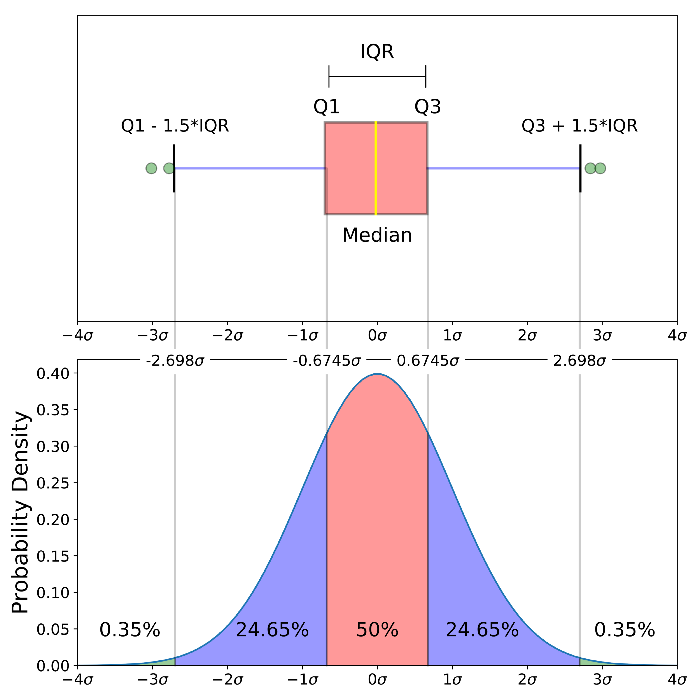

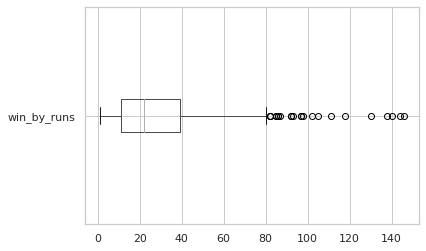

In [0]:
matches.loc[matches['win_by_runs']>0,'win_by_runs'].to_frame().boxplot(vert=False)

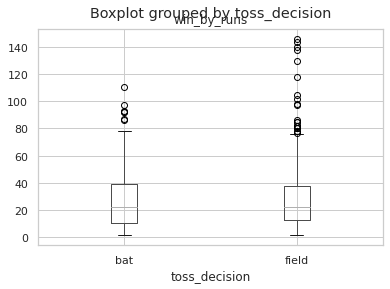

In [0]:
runs = matches.loc[matches['win_by_runs']>0,:]
runs.boxplot(column= 'win_by_runs', by = 'toss_decision')

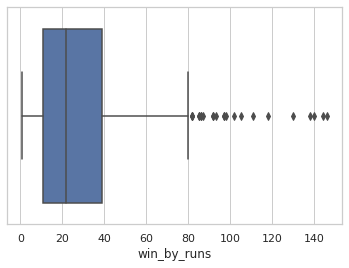

In [0]:
sns.boxplot(x = 'win_by_runs', data = runs)

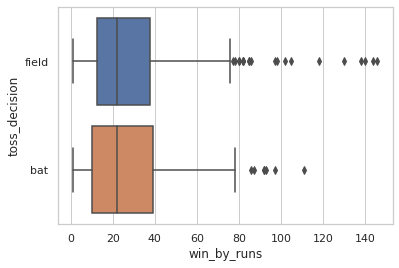

In [0]:
sns.boxplot(x = 'win_by_runs', y='toss_decision', data = runs)

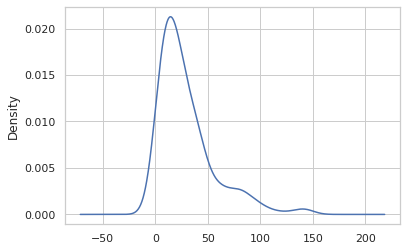

In [0]:
runs.win_by_runs.plot(kind= 'density') # right-skewed

#### ___Scatter Plot___

Scatter plot
Scatter plots help us see relationship between variables or how much one variable is affected by another. We can infer by looking at the plot, whether there is a positive or negative or no association between the variables. Following is a sample scatter plot between Variable A and Variable B.

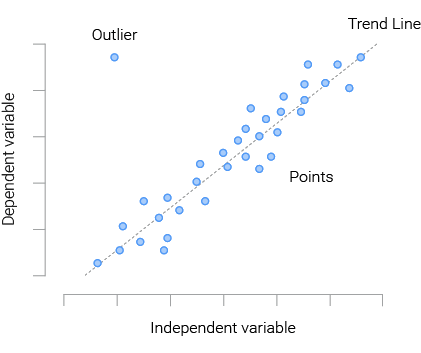

We can see that there is a positive association between Variable A and Variable B. i.e. Variable A increases as variable B increases.

Some datasets many contain a few data points that doesn't fit the pattern. They're called outliers.

A scatter chart can suggest a linear relationship between 2 variables(i.e. a straight line).

In [0]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [0]:
highest_score_batsman = deliveries.groupby(['match_id', 'batting_team', 'batsman'])['batsman_runs'].sum().max(level = ['match_id', 'batting_team'])

total_runs = deliveries.groupby(['match_id', 'batting_team'])['total_runs'].sum()

match_total_highest_combined = pd.concat([highest_score_batsman, total_runs], axis=1)
match_total_highest_combined.head()

batsman_runs  total_runs
match_id batting_team                                         
1        Royal Challengers Bangalore            32         172
         Sunrisers Hyderabad                    62         207
2        Mumbai Indians                         38         184
         Rising Pune Supergiant                 84         187
3        Gujarat Lions                          68         183

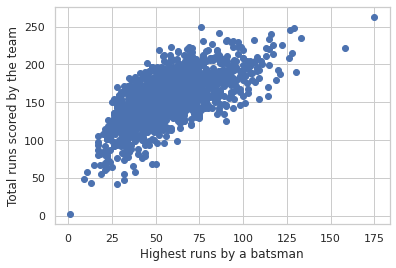

In [0]:
plt.scatter(match_total_highest_combined.batsman_runs, match_total_highest_combined.total_runs)
plt.xlabel("Highest runs by a batsman")
plt.ylabel("Total runs scored by the team")
plt.show()

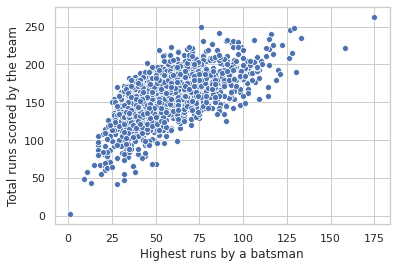

In [0]:
sns.scatterplot(match_total_highest_combined.batsman_runs, match_total_highest_combined.total_runs)
plt.xlabel("Highest runs by a batsman")
plt.ylabel("Total runs scored by the team")
plt.show()

#### ___Pair Plot___

The pair plot technique allows us to visualize distributions of individual numerical features, as well as correlations/relationships between numerical features. Pair plot is a handy technique because it is very easy to implement and allows us to quickly see all of the relationships between each of our features by pairing them together.

Seaborn pair plot command will not run if there are NaN values in the data frame.

Output of Pair Plot has two basic types of graphs: histograms for each numerical feature showing the distribution of values and scatter plots of the numerical values plotted against each other.

The histograms are displayed in a diagonal fashion starting in the upper left cell, or the (0, 0)th cell, of the grid and continue down to the bottom right cell, or the (n-1, n-1)th cell, each histogram can be looked by the corresponding labels on either the x-axis or the y-axis.

The scatter plots can be located in all other cells on the grid. We can identify the individual features plotted in each cell by looking at the corresponding labels on either the x-axis or the y-axis.

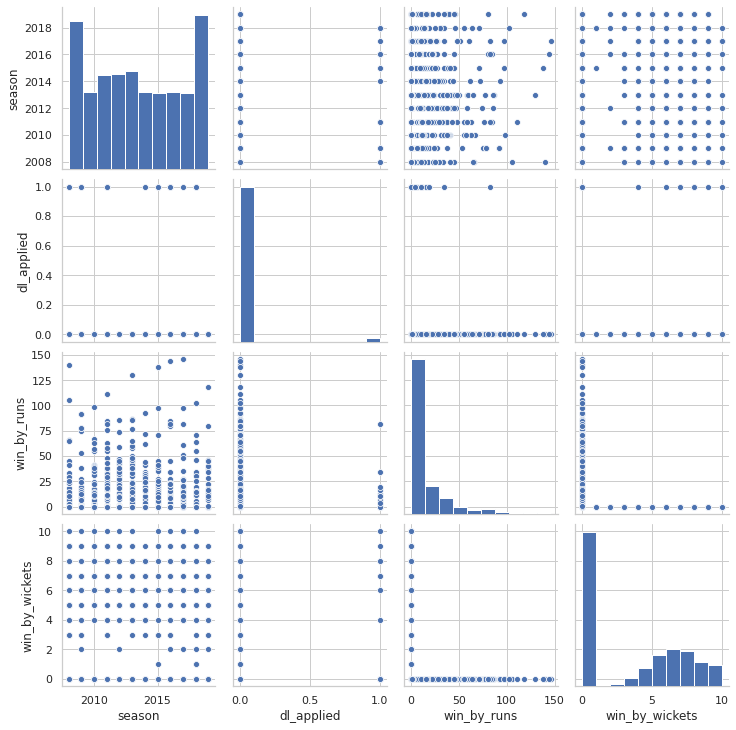

In [0]:
sns.pairplot(matches.iloc[:,1:]) # not including id column here